In [ ]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
# Define the parameters
input_shape = (224, 224, 3)  # Input image shape
num_classes = 20  # Number of persons in the dataset
batch_size = 32
epochs = 10

In [ ]:
# Load the pre-trained VGG19 model without the top layer
base_model = keras.applications.VGG19(
    weights='imagenet',
    include_top=False,
    input_shape=input_shape
)

80134624/80134624 [==============================] - 0s 0us/step


In [ ]:
# Freeze the pre-trained layers
base_model.trainable = False


In [ ]:
# Add a new classifier on top of the pre-trained layers
model = keras.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


In [ ]:
# Create a data generator for loading the images
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [ ]:
# Load the images from the dataset folders
train_dataset = data_generator.flow_from_directory(
    '/content/gdrive/MyDrive/Project Gait Analysis/Result/opfl',
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='sparse'  # Assumes folder names represent the class labels
)

Found 160 images belonging to 20 classes.


In [ ]:
# Train the model
history=model.fit(
    train_dataset,
    epochs=epochs
)

Epoch 1/10
5/5 [==============================] - 131s 24s/step - loss: 6.3024 - accuracy: 0.0375
Epoch 2/10
5/5 [==============================] - 120s 24s/step - loss: 4.7276 - accuracy: 0.0812
Epoch 3/10
5/5 [==============================] - 119s 24s/step - loss: 3.0843 - accuracy: 0.1125
Epoch 4/10
5/5 [==============================] - 120s 24s/step - loss: 2.6742 - accuracy: 0.1875
Epoch 5/10
5/5 [==============================] - 119s 24s/step - loss: 2.4070 - accuracy: 0.2562
Epoch 6/10
5/5 [==============================] - 119s 23s/step - loss: 2.1837 - accuracy: 0.4625
Epoch 7/10
5/5 [==============================] - 118s 23s/step - loss: 1.9956 - accuracy: 0.5188
Epoch 8/10
5/5 [==============================] - 118s 23s/step - loss: 1.7556 - accuracy: 0.6625
Epoch 9/10
5/5 [==============================] - 118s 23s/step - loss: 1.5830 - accuracy: 0.7688
Epoch 10/10
5/5 [==============================] - 116s 23s/step - loss: 1.4336 - accuracy: 0.7563


In [ ]:
# Evaluate the model
_, accuracy = model.evaluate(train_dataset)
print('Accuracy:', accuracy)

5/5 [==============================] - 115s 23s/step - loss: 1.3094 - accuracy: 0.8250
Accuracy: 0.824999988079071


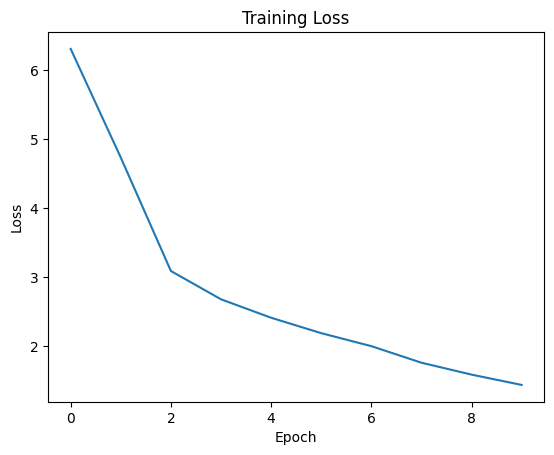

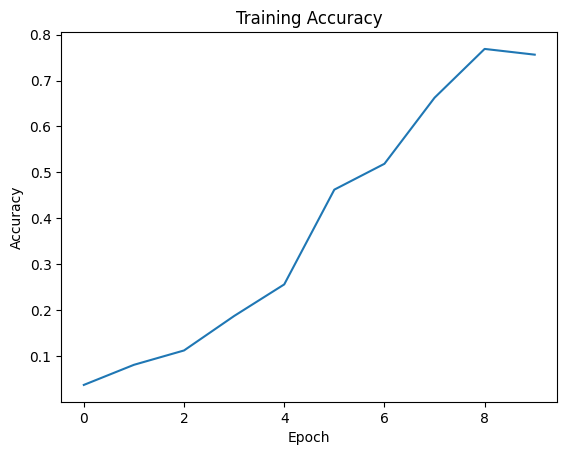

In [ ]:
import matplotlib.pyplot as plt

# Plot the training loss
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Plot the training accuracy
plt.plot(history.history['accuracy'])
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()
